In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load CSV from the same folder
dataframe = pd.read_csv("Zomato-data-.csv")
print("Data loaded successfully!")
print(dataframe.head())


Data loaded successfully!
                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

In [5]:
print("\nDataframe info:")
print(dataframe.info())


Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB
None


In [6]:
print("\nNull values in each column:")
print(dataframe.isnull().sum())


Null values in each column:
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


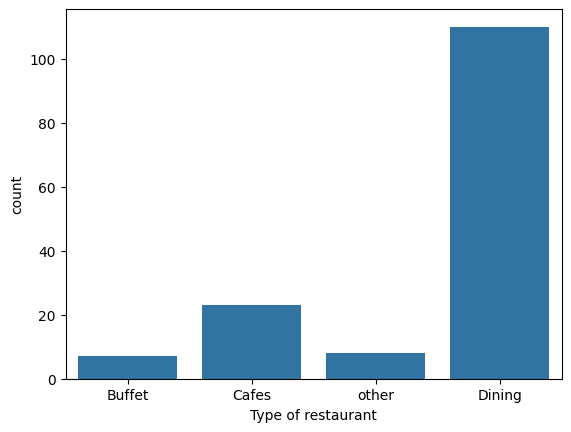

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")
plt.show()

In [8]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})

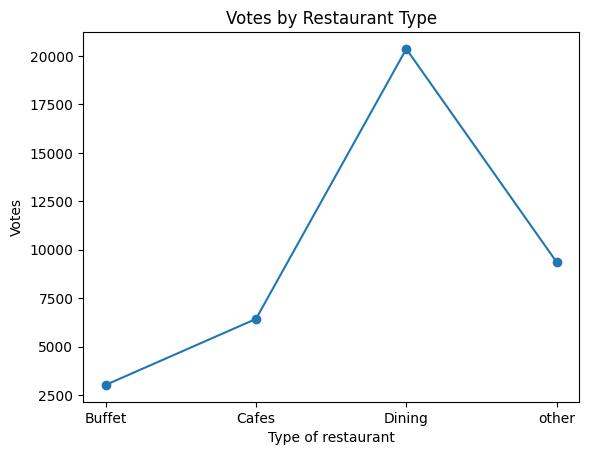

In [9]:
plt.plot(result, marker='o')
plt.xlabel('Type of restaurant')
plt.ylabel('Votes')
plt.title('Votes by Restaurant Type')
plt.show()

In [10]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print('\nRestaurant(s) with the maximum votes:')
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


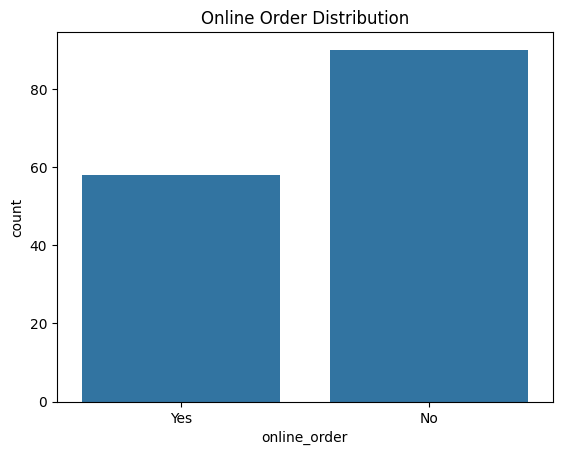

In [11]:
sns.countplot(x=dataframe['online_order'])
plt.title("Online Order Distribution")
plt.show()

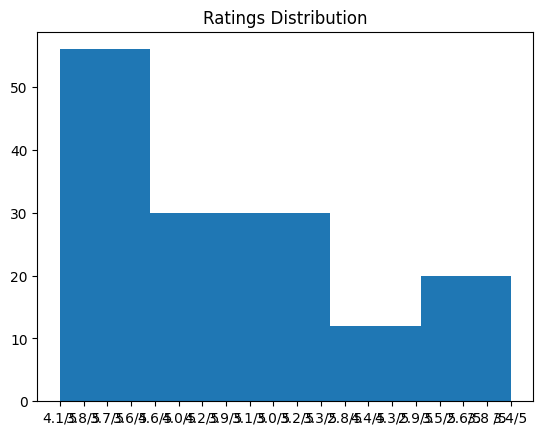

In [12]:
plt.hist(dataframe['rate'], bins=5)
plt.title('Ratings Distribution')
plt.show()

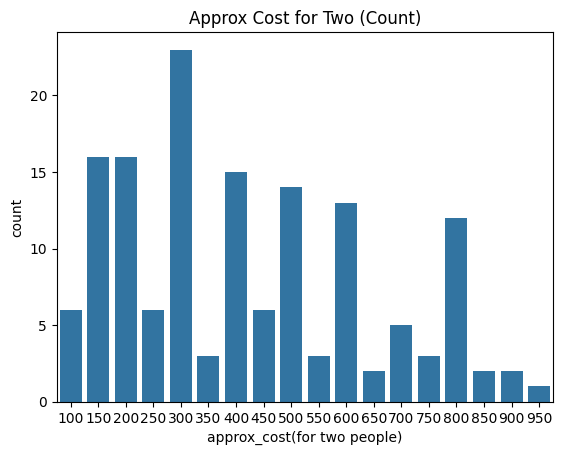

In [13]:
couple_data = dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.title("Approx Cost for Two (Count)")
plt.show()

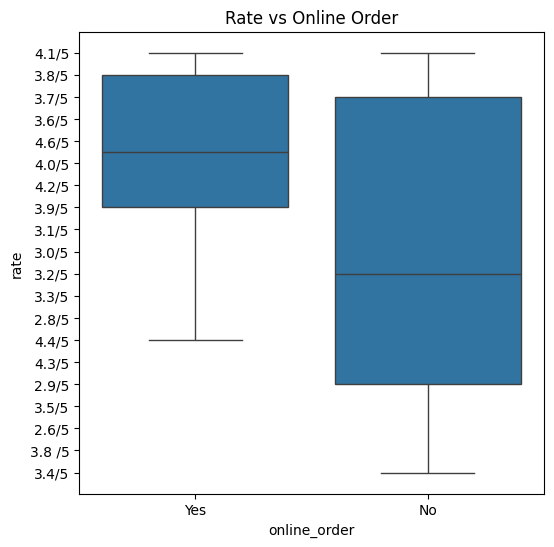

In [14]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=dataframe)
plt.title("Rate vs Online Order")
plt.show()

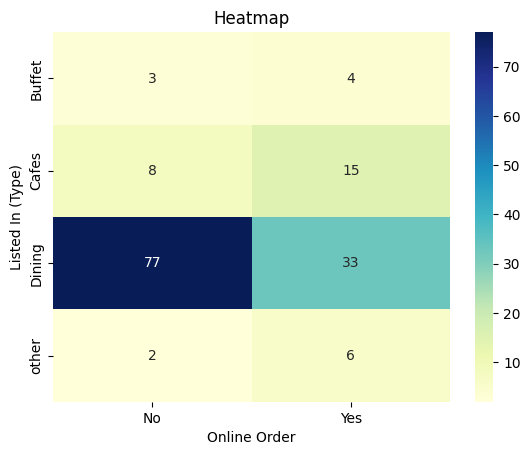

In [15]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()